# Rlab01

- Student: Giovanni Zago
- Course: PoD
- Matriculation number: 2089577

# Exercise 1

In [4]:
library(tidyverse)
library(ggplot2)
library (magrittr)
library(lubridate)
options(repr.plot.width=15, repr.plot.height=8) # allows to display bigger plots

## Request no. 1

Read the data and import them in a data.frame or tibble structure.

In [5]:
american_airline <- read.delim("american_airline_empl.txt", header = T)
american_airline <- as_tibble(american_airline)
delta_airline <- read.delim("delta_airline_empl.txt", header = T)
delta_airline <- as_tibble(delta_airline)
federal_express <- read.delim("federal_express_empl.txt", header = T)
federal_express <- as_tibble(federal_express)
united_airline <- read.delim("united_airline_empl.txt", header = T)
united_airline <- as_tibble(united_airline)

## Request no. 2

Merge the four data tibble in a common tibble

In [6]:
# here I create a column that specifies the Airline corresponding to each row
american_airline <- american_airline %>% mutate(Airline = rep('AA', times = nrow(american_airline)))
delta_airline <- delta_airline %>% mutate(Airline = rep('DA', times = nrow(delta_airline)))
federal_express <- federal_express %>% mutate(Airline = rep('FE', times = nrow(federal_express)))
united_airline <- united_airline %>% mutate(Airline = rep('UA', times = nrow(united_airline)))

head(federal_express) # show the head of one of the four tibble just to check if the new column has been properly added

Month,Year,Full.time,Part.time,Grand.Total,Airline
<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1990,"61,305","23,580","84,885",FE
2,1990,"61,485","23,520","85,005",FE
3,1990,"62,244","22,774","85,018",FE
4,1990,"63,511","22,917","86,428",FE
5,1990,"63,044","23,382","86,426",FE
6,1990,"64,704","23,246","87,950",FE


In [7]:
data_tbl <- bind_rows(american_airline, delta_airline, federal_express, united_airline) # merging the four tibbles

# convert the Full.time, Part.time and Grand.Total columns from string to int
data_tbl <- data_tbl %>% mutate(Full.time = str_replace(Full.time, ",", ""), Part.time = str_replace(Part.time, ",", ""), Grand.Total = str_replace(Grand.Total, ",", ""))
data_tbl <- data_tbl %>% mutate(Full.time = as.integer(Full.time), Part.time = as.integer(Part.time), Grand.Total = as.integer(Grand.Total))
head(data_tbl)

Month,Year,Full.time,Part.time,Grand.Total,Airline
<int>,<int>,<int>,<int>,<int>,<chr>
1,1990,68137,9039,77176,AA
2,1990,68725,9273,77998,AA
3,1990,69509,9376,78885,AA
4,1990,69713,9326,79039,AA
5,1990,70376,9309,79685,AA
6,1990,71258,9369,80627,AA


## Request no. 3

Produce  a  plot  of  the  behaviour  of  the  employees  as  a  function  of  time  for  all  four  companies, separately for the number of full-time and part-time employees.

Here I add the column ```month_year``` where I first store a string with the format ```04-2023```, which is the correct format that has to be given in input to the function ```my()``` provided by lubridate in order to convert the string to a ```date```.

In [8]:
data_tbl <- data_tbl %>% 
    mutate(month_year = case_when(nchar(as.character(Month)) == 1 ~ paste('0', as.character(Month), '-', as.character(Year), sep = ''), 
        .default = paste(as.character(Month), '-', as.character(Year), sep = ''))) %>% 
    mutate(month_year = my(month_year))

head(data_tbl)

Month,Year,Full.time,Part.time,Grand.Total,Airline,month_year
<int>,<int>,<int>,<int>,<int>,<chr>,<date>
1,1990,68137,9039,77176,AA,1990-01-01
2,1990,68725,9273,77998,AA,1990-02-01
3,1990,69509,9376,78885,AA,1990-03-01
4,1990,69713,9326,79039,AA,1990-04-01
5,1990,70376,9309,79685,AA,1990-05-01
6,1990,71258,9369,80627,AA,1990-06-01


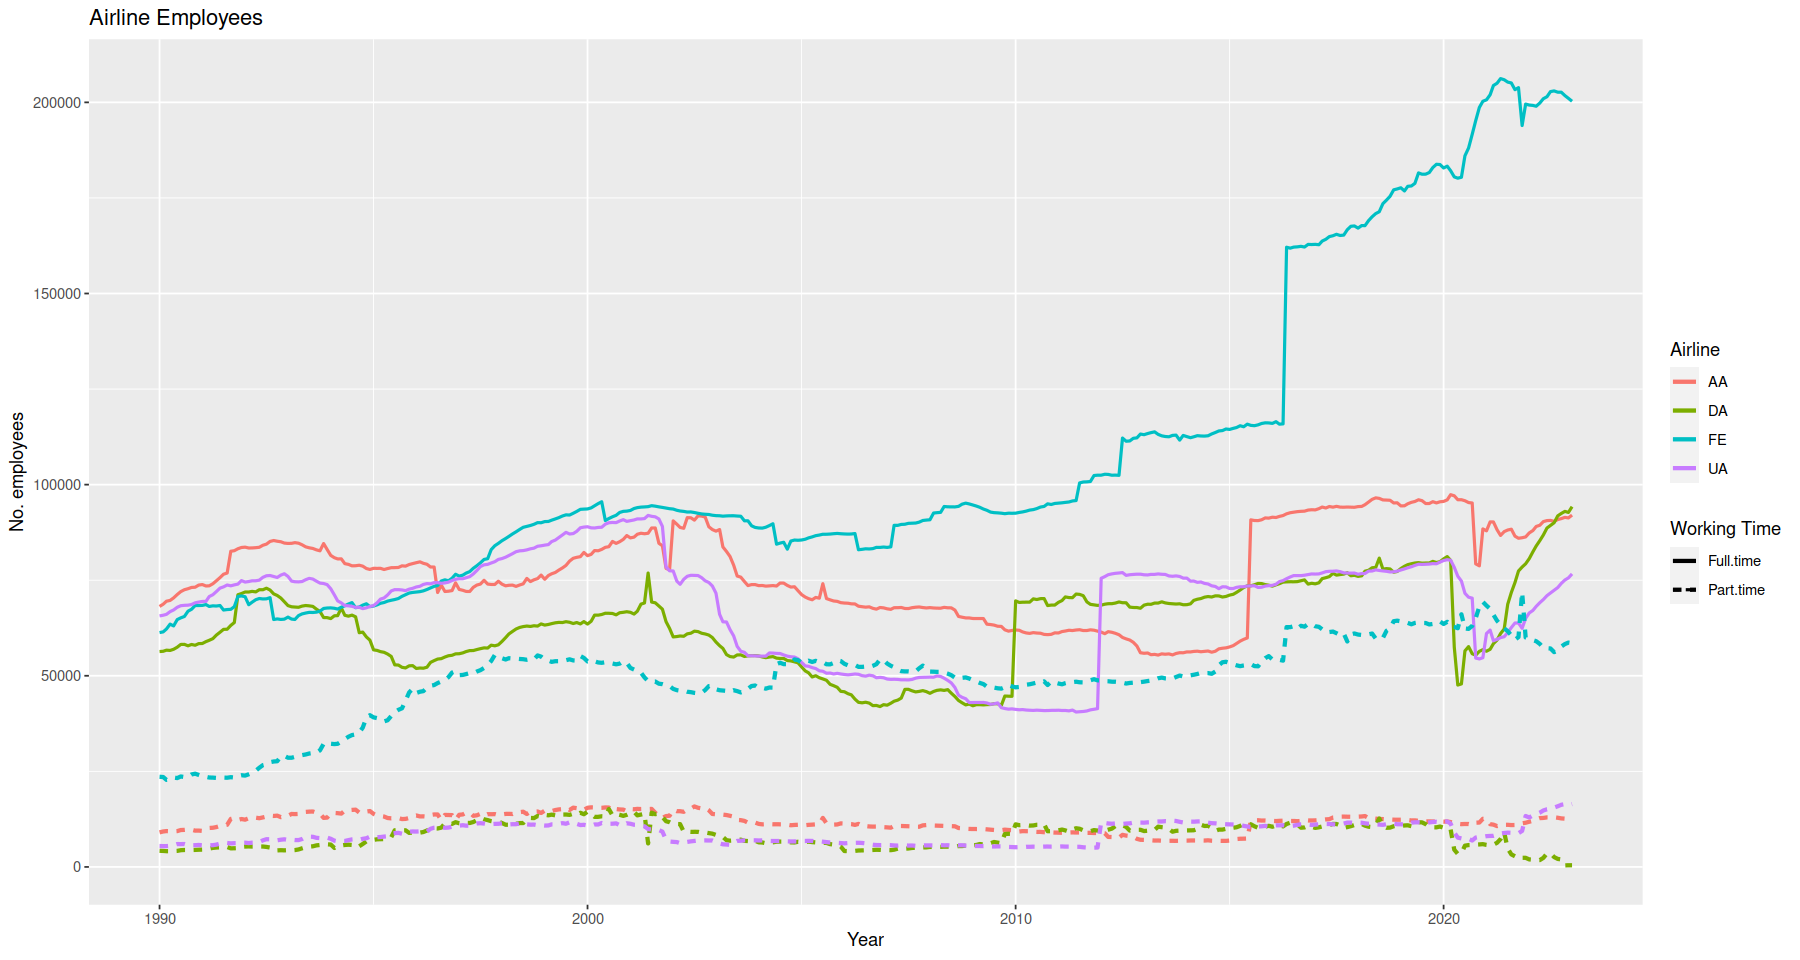

In [9]:
p1 <- ggplot(data = data_tbl) + geom_line(aes(x = month_year, y = Full.time, colour = Airline, linetype = 'Full.time'), linewidth = 0.9) + 
    geom_line(aes(x = month_year, y = Part.time, colour = Airline, linetype = 'Part.time'), linewidth = 1.2) +
    labs(x = 'Year', y = 'No. employees', colour = 'Airline', linetype = 'Working Time', title = 'Airline Employees')
p1

## Request no. 4

When did each company reach the minimum and maximum number of employees?

To answer this question I first group by ```Airline``` my tibble (since the required information regards each airline) and then I perform a ```filter()``` operation in which I select the appropriate rows, i.e. those where ```Grand.Total``` is maximun/minimum. The output is a grouped tibble in which the user can see the required information. 

In [10]:
emp_stats <- data_tbl %>% group_by(Airline) %>% filter(Grand.Total == max(Grand.Total) | Grand.Total == min(Grand.Total))
emp_stats

Month,Year,Full.time,Part.time,Grand.Total,Airline,month_year
<int>,<int>,<int>,<int>,<int>,<chr>,<date>
9,2013,55462,6828,62290,AA,2013-09-01
6,2018,96543,12628,109171,AA,2018-06-01
11,2006,41948,4462,46410,DA,2006-11-01
1,2023,94236,439,94675,DA,2023-01-01
1,1990,61305,23580,84885,FE,1990-01-01
3,2021,204406,65977,270383,FE,2021-03-01
3,2001,91041,11005,102046,UA,2001-03-01
6,2011,40522,5259,45781,UA,2011-06-01


## Request no. 5

Plot the fraction of part-time worker over the total employees as a function of time.

Month,Year,Full.time,Part.time,Grand.Total,Airline,month_year,Ratio
<int>,<int>,<int>,<int>,<int>,<chr>,<date>,<dbl>
1,1990,68137,9039,77176,AA,1990-01-01,0.1171219
2,1990,68725,9273,77998,AA,1990-02-01,0.1188877
3,1990,69509,9376,78885,AA,1990-03-01,0.1188566
4,1990,69713,9326,79039,AA,1990-04-01,0.1179924
5,1990,70376,9309,79685,AA,1990-05-01,0.1168225
6,1990,71258,9369,80627,AA,1990-06-01,0.1162018


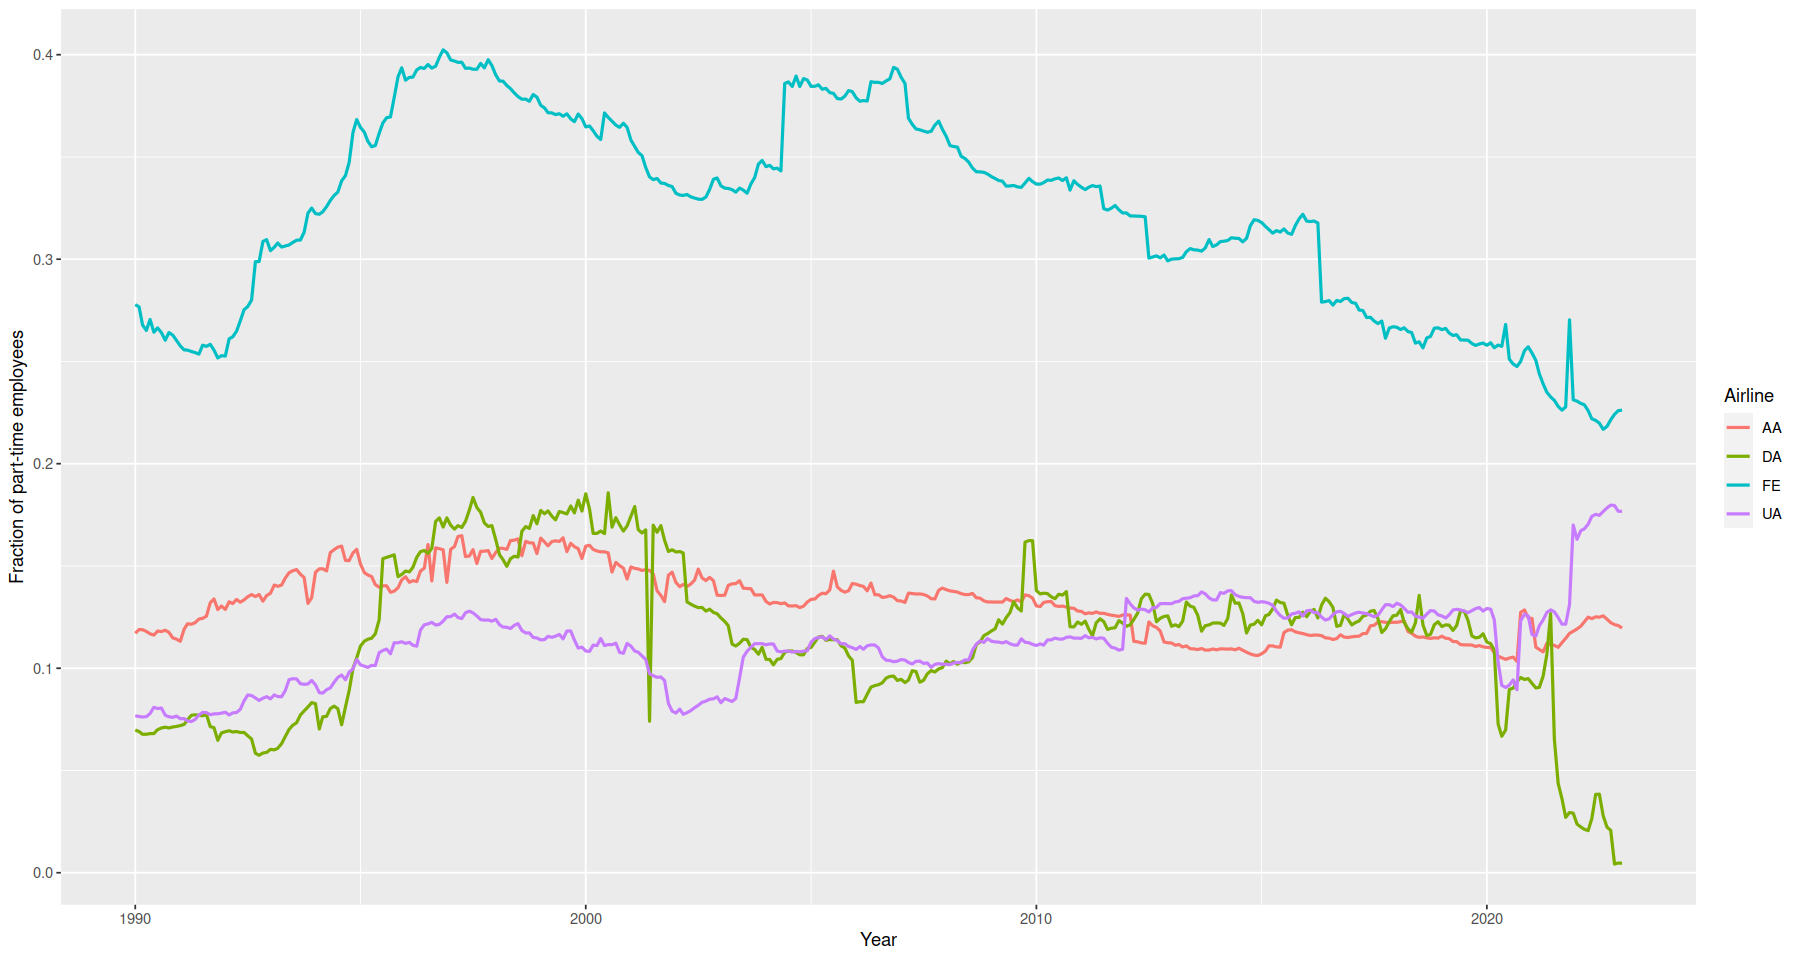

In [11]:
data_tbl <- data_tbl %>% mutate(Ratio = Part.time / Grand.Total) # add a column with the required fraction to the tibble
head(data_tbl)
p1 <- ggplot(data = data_tbl) + geom_line(aes(x = month_year, y = Ratio, colour = Airline), linewidth = 0.9) + 
    labs(x = 'Year', y = 'Fraction of part-time employees')
p1

## Request no. 6

Did the COVID-19 pandemic have any influence in the employed workers of the airline companies? Can you see a trend in the years 2019-2023?

To answer this request I plot the number of total employees (```Grand.Total```) in the years 2019-2023 and attach to each data line a linear trend line with its correspondent confidence interval. It emerges that all airlines except FE show a negative trend in the considered time interval, that however seems to start inverting in the period 2022-2023. It is also possible to notice that FE is the only airline that did not have a significative drop in the number of employees during 2020, instead FE started hiring at the end of that year.

`geom_smooth()` using formula = 'y ~ x'


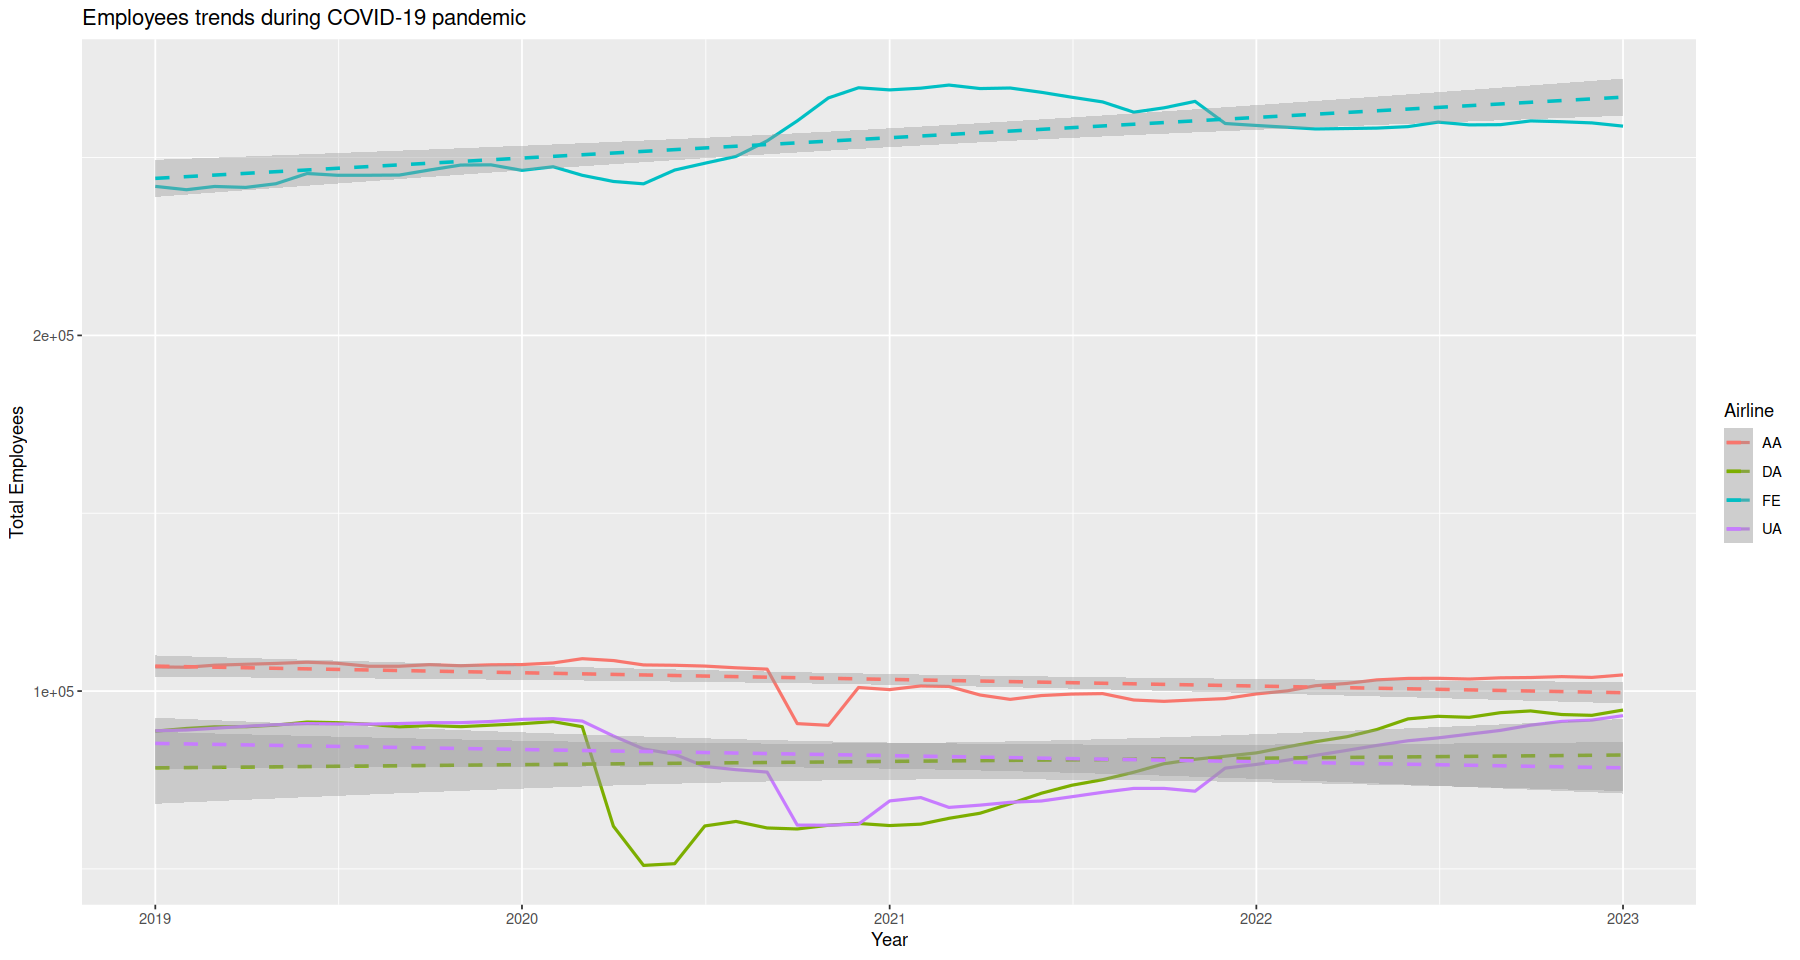

In [12]:
p1 <- ggplot(data = filter(data_tbl, Year >= 2019 & Year <= 2023)) + geom_line(aes(x = month_year, y = Grand.Total, colour = Airline), linewidth = 0.9) + 
    geom_smooth(aes(x = month_year, y = Grand.Total, colour = Airline), method = lm, level = 0.99, linetype = 2) + 
    labs(x = 'Year', y = 'Total Employees', title = 'Employees trends during COVID-19 pandemic')
p1

# Exercise 2

In [13]:
library(nycflights13)

ERROR: Error in library(nycflights13): there is no package called ‘nycflights13’


## Request 1.1

Plot the total number of flights departed from each of the three NYC airports as a function of time (one entry for each of the 365 days of the year).

`summarise()` has grouped output by 'f_date'. You can override using the
`.groups` argument.


f_date,origin,no_flights
<date>,<chr>,<int>
2013-01-01,EWR,301
2013-01-01,JFK,272
2013-01-01,LGA,233
2013-01-02,EWR,346
2013-01-02,JFK,296
2013-01-02,LGA,265


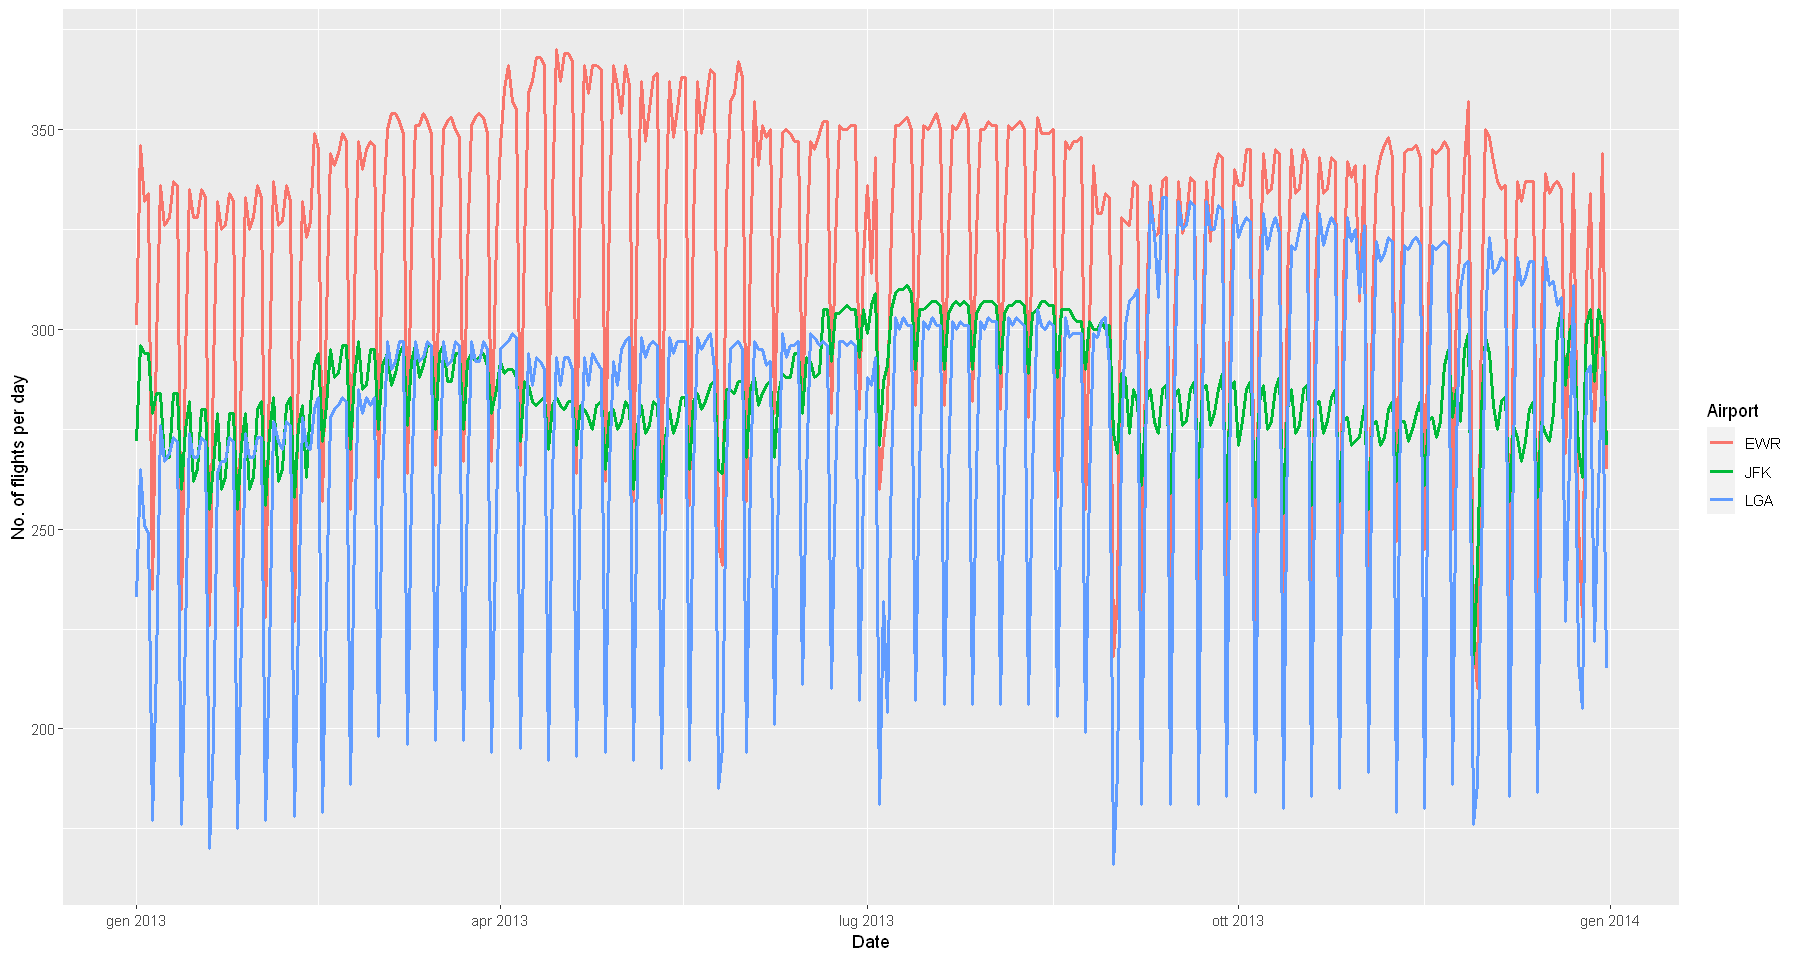

In [ ]:
flights_perday <- flights %>% 
    mutate(f_date = as_date(time_hour)) %>% # extracts a date object from the pre-existing column time_hour
    group_by(f_date, origin) %>% 
    summarise(no_flights = n_distinct(flight)) %>% 
    ungroup()

head(flights_perday)

p1 <- ggplot(data = flights_perday) + geom_line(aes(x = f_date, y = no_flights, color = origin), linewidth = 0.9) +
    labs(x = 'Date', y = 'No. of flights per day', color = 'Airport')
p1

## Request 1.2

Plot the average number of flights computed over the first five working days of each week as a function of the week number of the year. Produce the same plot for the flights departing over the weekend (Saturdays and Sundays).

`summarise()` has grouped output by 'no_week', 'day_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'no_week'. You can override using the
`.groups` argument.


no_week,day_type,avg_no_flights
<int>,<chr>,<dbl>
1,H,700.0
1,W,918.8
2,H,686.0
2,W,823.0
3,H,660.5
3,W,819.4


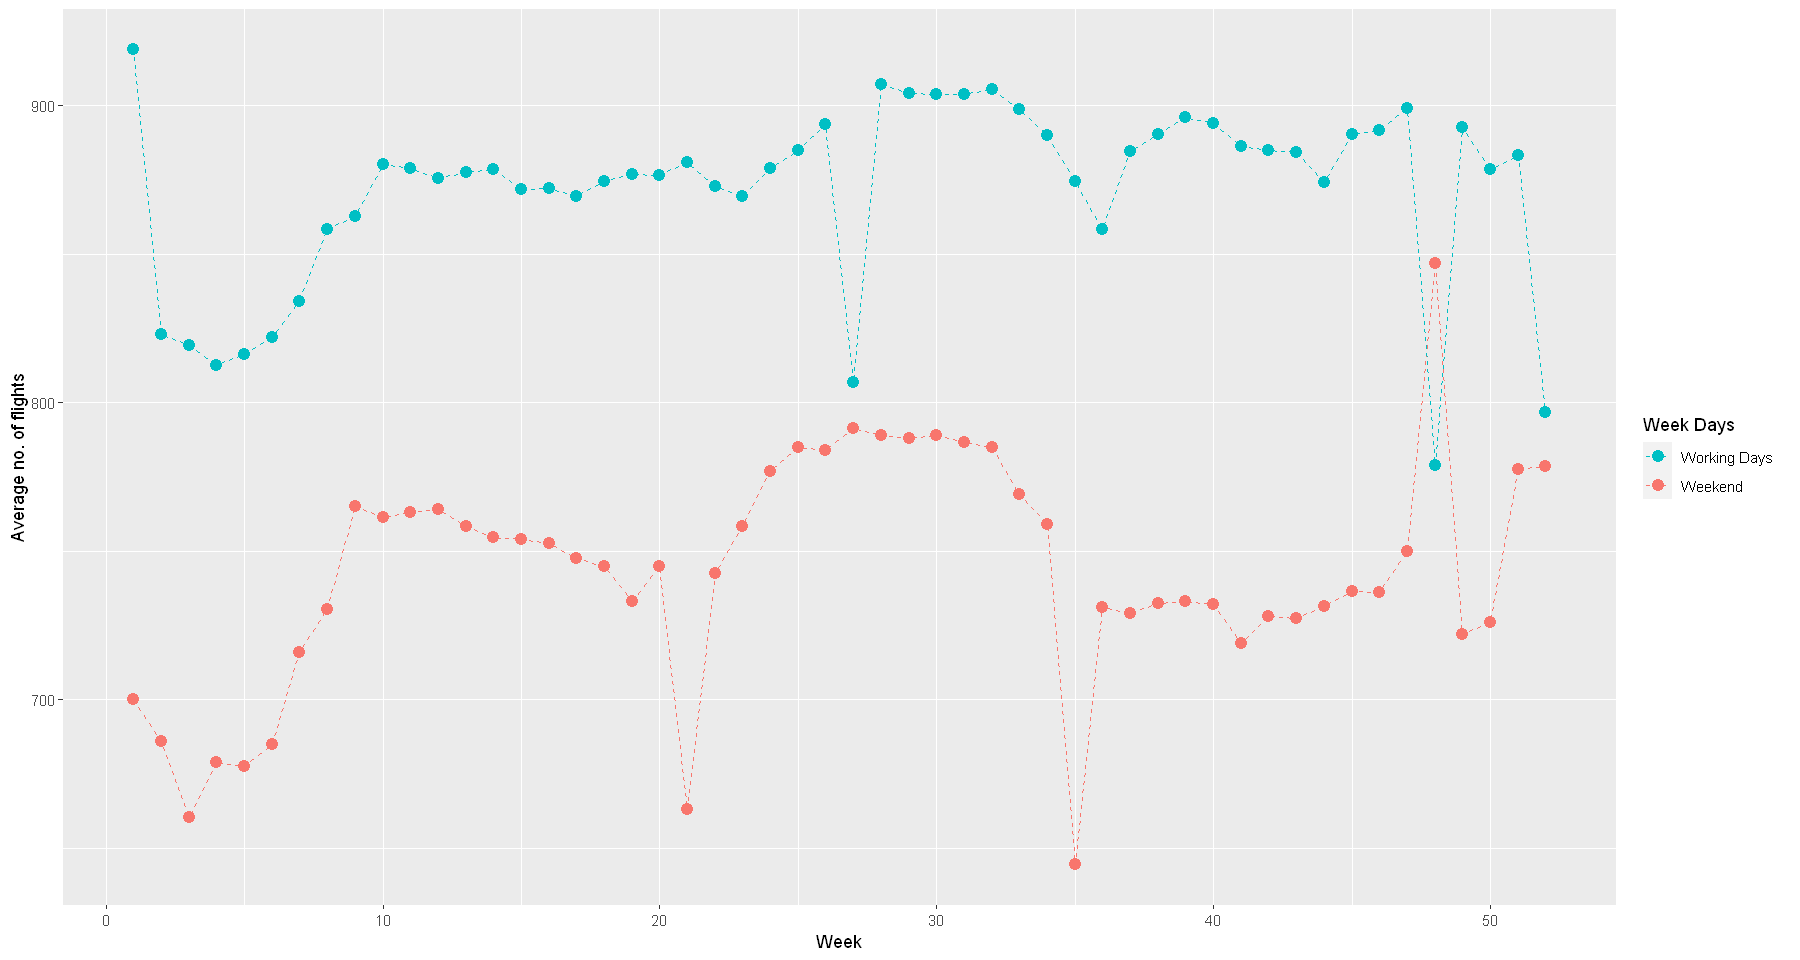

In [ ]:
week_avg_flights <- flights %>%  mutate(f_date = as_date(time_hour)) %>% 
    mutate(no_week = strftime(f_date, format = '%V')) %>% 
    mutate(no_week = as.integer(no_week)) %>% 
    mutate(no_day = wday(f_date)) %>% 
    # here I add a column that specifies the type of day: H = weekend day, W = working day
    mutate(day_type = case_when(no_day == 1 | no_day == 7 ~ 'H', .default = 'W')) %>% 
    group_by(no_week, day_type, no_day) %>% 
    summarise(no_flights = n_distinct(flight)) %>% 
    summarise(avg_no_flights = mean(no_flights))

head(week_avg_flights)

p1 <- ggplot(data = week_avg_flights) + geom_line(aes(x = no_week, y = avg_no_flights, colour = day_type), linewidth = .5, linetype = 2) +
    geom_point(aes(x = no_week, y = avg_no_flights, colour = day_type), shape = 19, size = 3) +
    labs(x = 'Week', y = 'Average no. of flights', colour = 'Week Days') + 
    scale_colour_discrete(labels = c('Weekend', 'Working Days'), guide = guide_legend(reverse = TRUE))
p1 

## Request 2.1

For each flight in the data frame, compute the departure delay and extract the following pieces of information (separately for each NYC airport):
- min, max and average delay for each day of the year (show the data in corresponding plots)

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


origin,f_date,avg_dep_delay,max_dep_delay,min_dep_delay
<chr>,<date>,<dbl>,<dbl>,<dbl>
EWR,2013-01-01,17.483553,379,-13
EWR,2013-01-02,25.322674,334,-11
EWR,2013-01-03,8.450450,174,-13
EWR,2013-01-04,12.103858,288,-14
EWR,2013-01-05,5.696203,225,-16
EWR,2013-01-06,12.383333,202,-12


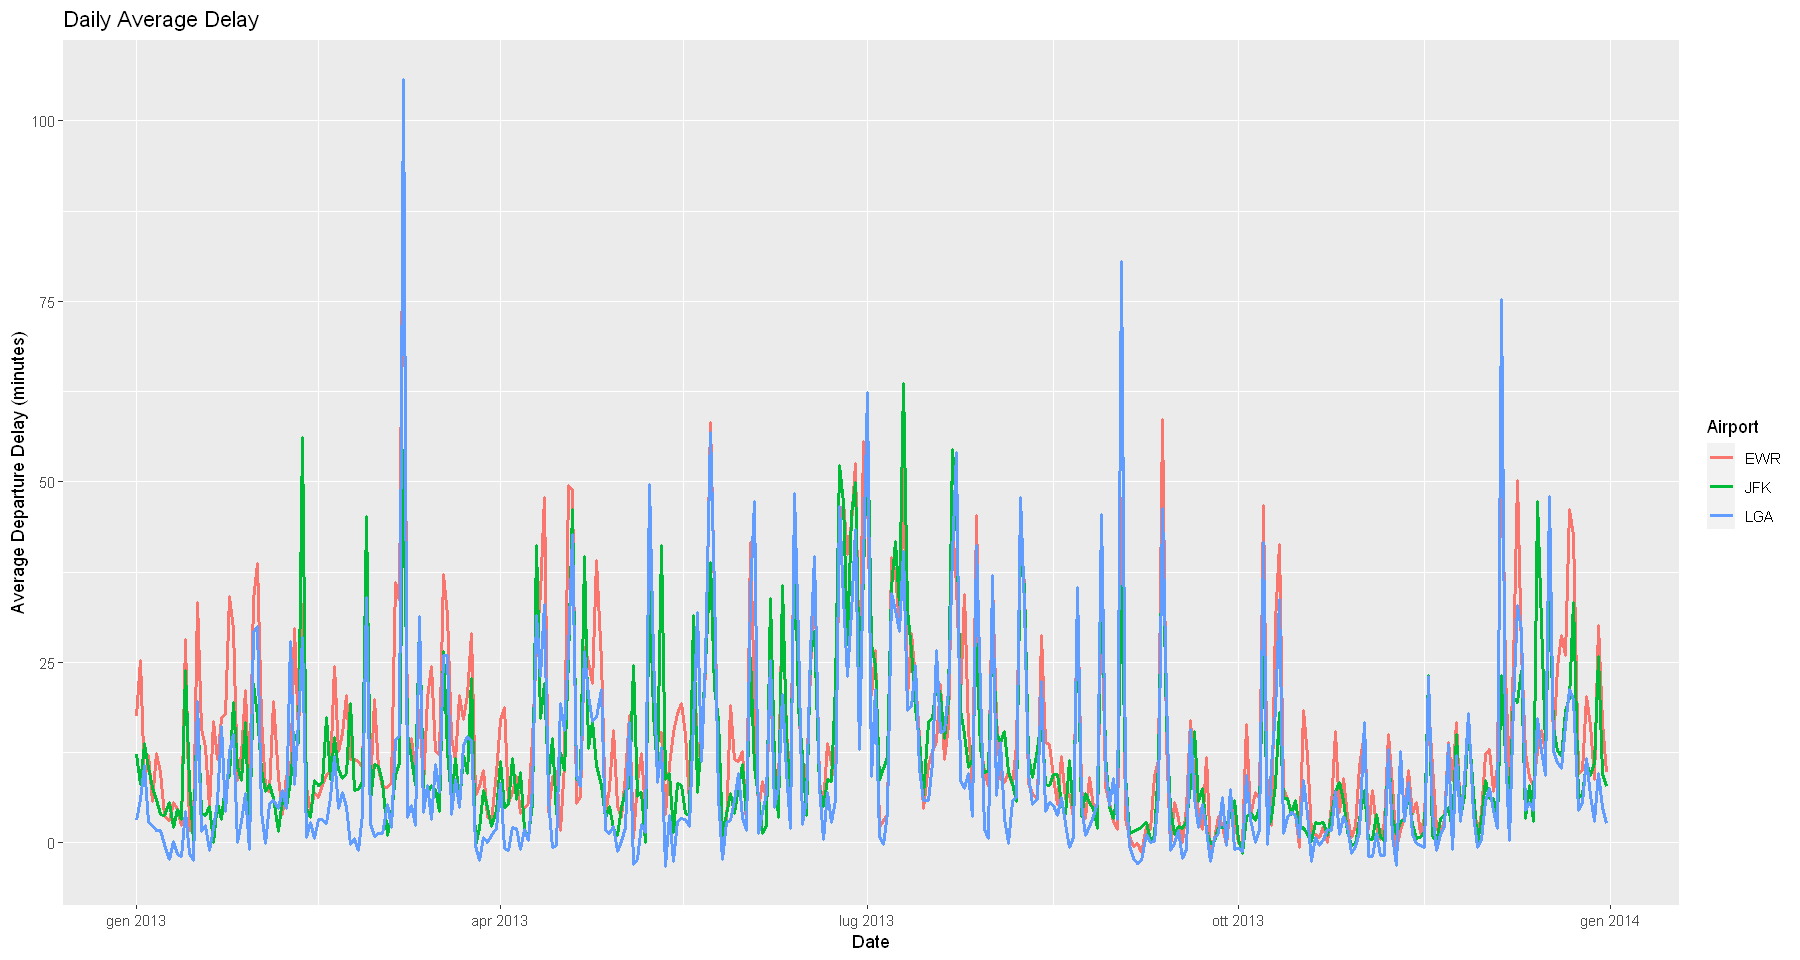

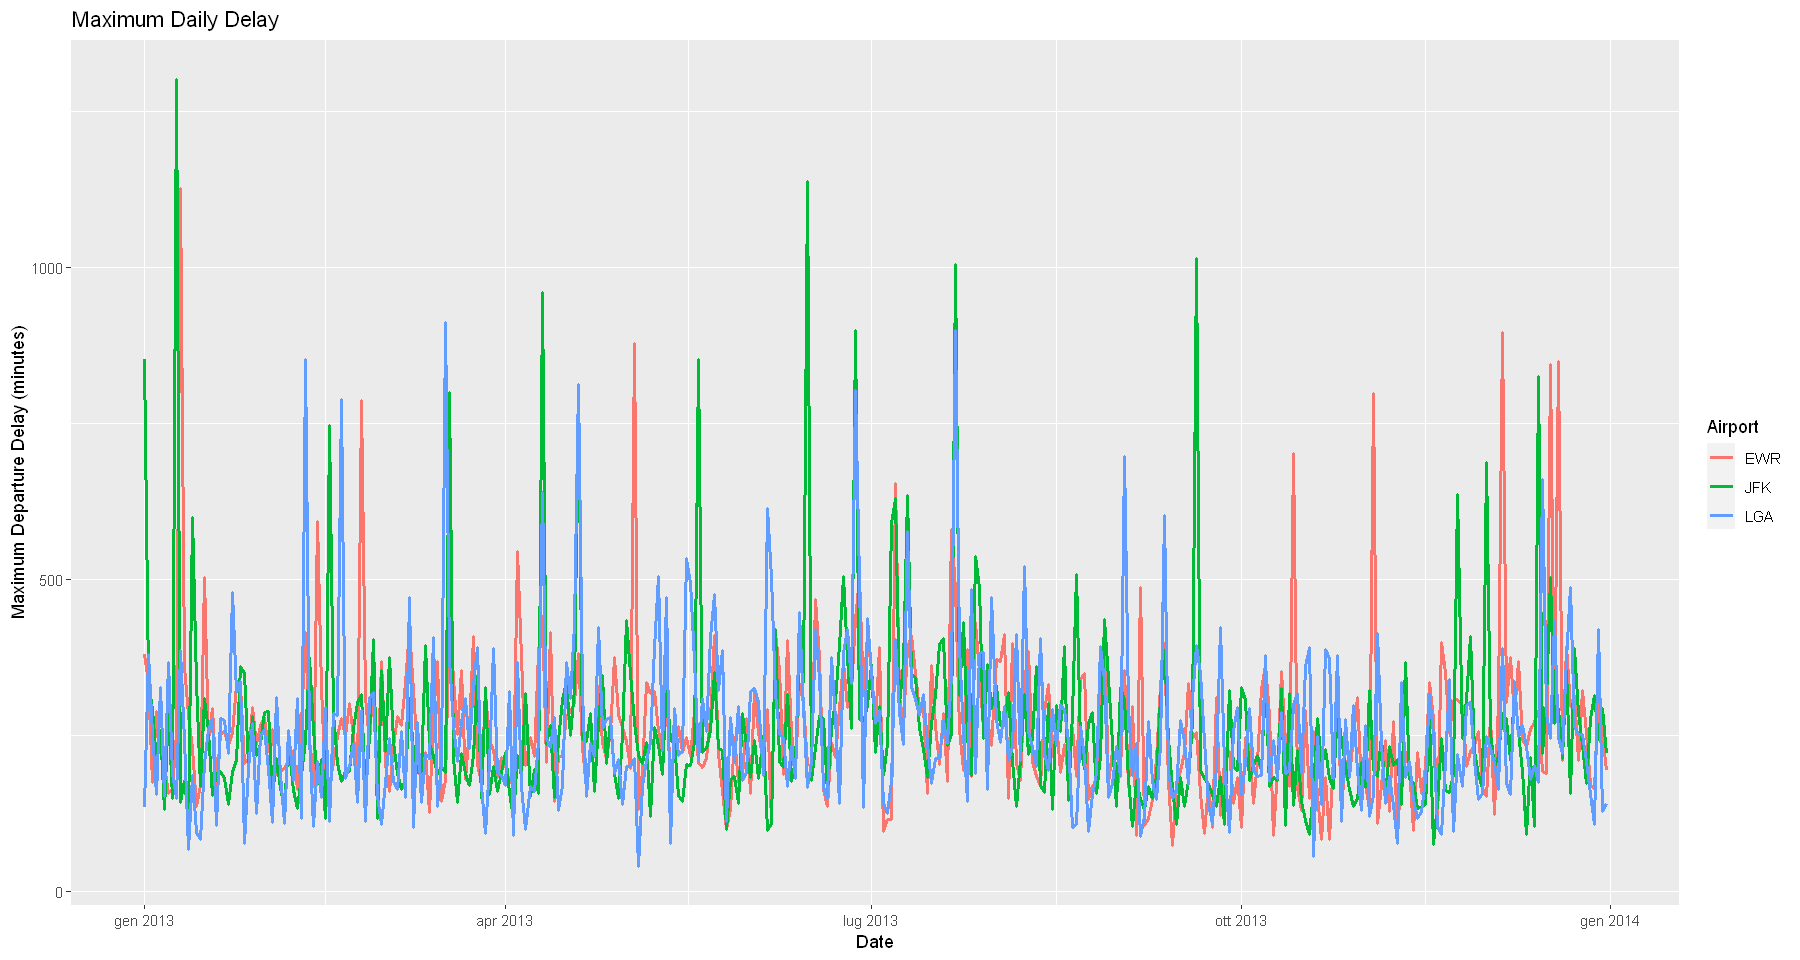

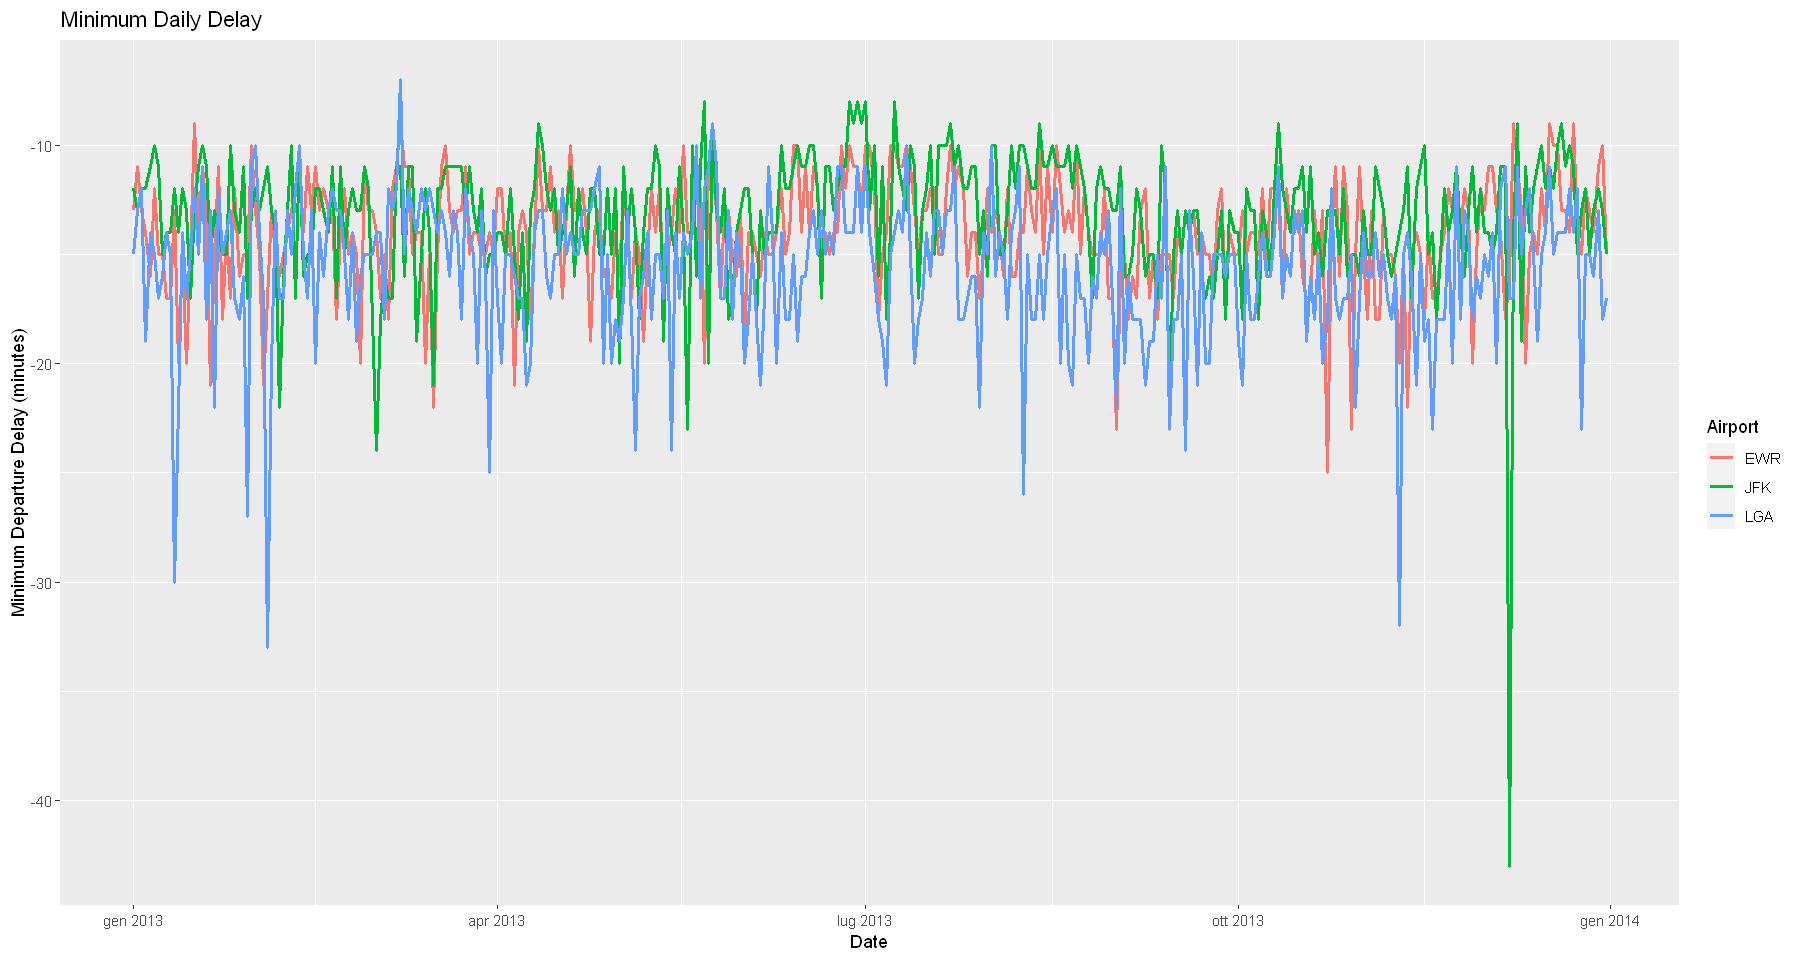

In [ ]:
flights_delays <- flights %>% 
    mutate(f_date = as_date(time_hour)) %>% 
    group_by(origin, f_date) %>% 
    summarise(avg_dep_delay = mean(dep_delay, na.rm = T), max_dep_delay = max(dep_delay, na.rm = T), min_dep_delay = min(dep_delay, na.rm = T))

head(flights_delays)

p1 <- ggplot(data = flights_delays) + geom_line(aes(x = f_date, y = avg_dep_delay, color = origin), linewidth = 0.9) +
    labs(x = 'Date', y = 'Average Departure Delay (minutes)', title = 'Daily Average Delay', color = 'Airport')
p1
p1 <- ggplot(data = flights_delays) + geom_line(aes(x = f_date, y = max_dep_delay, color = origin), linewidth = 0.9) + 
    labs(x = 'Date', y = 'Maximum Departure Delay (minutes)', title = 'Maximum Daily Delay', color = 'Airport')
p1
p1 <- ggplot(data = flights_delays) + geom_line(aes(x = f_date, y = min_dep_delay, color = origin), linewidth = 0.9) +
    labs(x = 'Date', y = 'Minimum Departure Delay (minutes)', title = 'Minimum Daily Delay', color = 'Airport')
p1

## Request 3

Assuming the distance flew by the plane is, at first approximation, the distance between the two connecting airports (as given in the data frame), compute the average speed of each plane. Produce a plot of the average plane speed as a function of departure day of the year.

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `air_time = hm(air_time)`.
Caused by warning in `.parse_hms()`:
! Some strings failed to parse, or all strings are NAs"


f_date,avg_day_speed
<date>,<dbl>
2013-01-01,482.3851
2013-01-02,494.2921
2013-01-03,497.2052
2013-01-04,514.8165
2013-01-05,499.0209
2013-01-06,496.2888


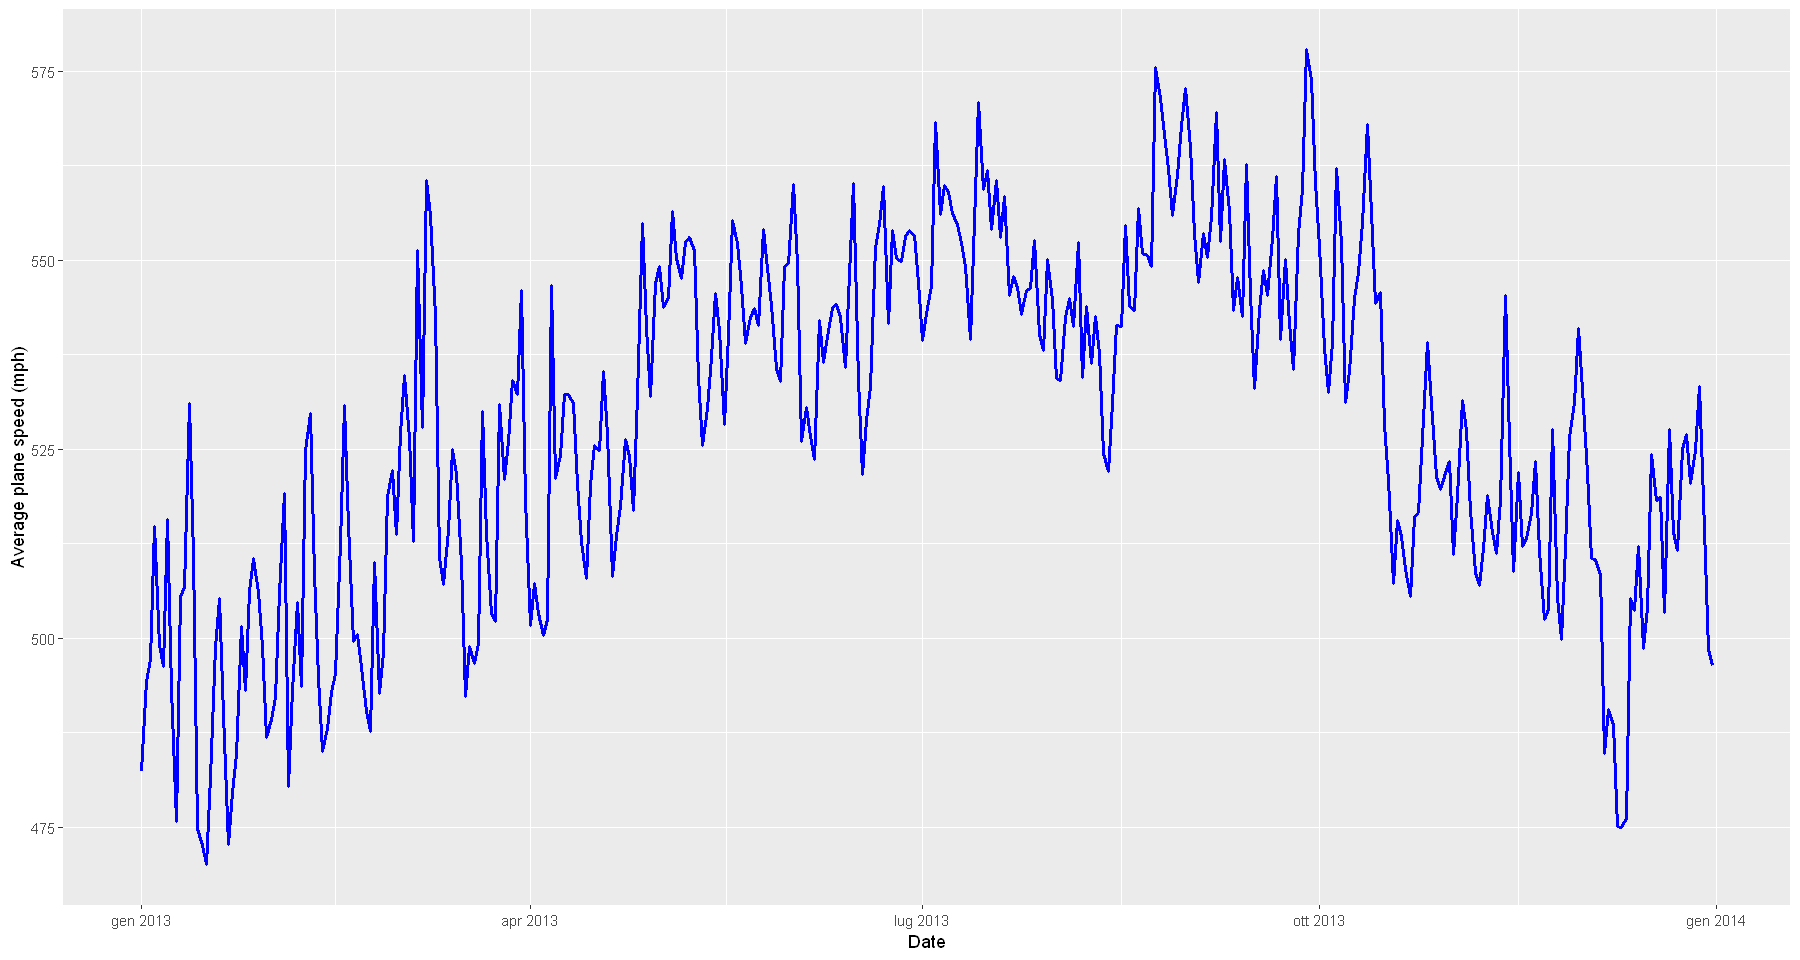

In [ ]:
flights_planes <- flights %>% 
    # convert air_time to character string
    mutate(air_time = as.character(air_time)) %>% 
    # here I add initial missing zeros and a colon between hours
    # and minutes in order to apply the correct format accepted in
    # input by the function hm(), which is, for example, 07:35.
    mutate(air_time = case_when(nchar(air_time) == 1 ~ paste('00:0', air_time, sep = ''), 
        nchar(air_time) == 2 ~ paste('00:', air_time, sep = ''), 
        nchar(air_time) == 3 ~ paste('0', air_time, sep = ''), 
        .default = air_time)) %>% 
    mutate(air_time = case_when(nchar(air_time) == 4 ~ gsub("^(.{2})(.*)$", "\\1:\\2", air_time), .default = air_time)) %>% 
    # here I apply hm() from lubridate
    mutate(air_time = hm(air_time)) %>%
    # here I convert the output of hm() into a
    # "decimal" hour format
    mutate(air_time = as.numeric(air_time, 'hours')) %>% 
    # compute the average speed of each plane
    mutate(avg_speed = distance / air_time) %>% 
    mutate(f_date = as_date(time_hour)) %>% 
    group_by(f_date) %>% 
    summarise(avg_day_speed = mean(avg_speed, na.rm = T))

head(flights_planes)

p1 <- ggplot(data = flights_planes) + geom_line(aes(x = f_date, y = avg_day_speed), linewidth = 0.9, colour = 'blue') +
    labs(x = 'Date', y = 'Average plane speed (mph)')
p1

## Request no. 4

Analyze the flights offered by each airline company and determine:
- the airline companies offering the largest two numbers of flights per day and per week

In [ ]:
# left join flighs and airlines to get all data needed
fl_airl <- left_join(x = flights, y = airlines, by = 'carrier') %>% 
        mutate(f_date = as_date(time_hour)) %>% 
        mutate(no_week = strftime(f_date, format = '%V')) %>% 
        mutate(no_week = as.integer(no_week))

# First find airline companies offering the largest two numbers of flights per day
fl_air_day <- fl_airl %>% 
        group_by(f_date, name) %>% 
        summarise(no_flights = n_distinct(flight)) %>% 
        filter(no_flights == sort(no_flights, decreasing = T)[1] | no_flights == sort(no_flights, decreasing = T)[2])

head(fl_air_day)

# Secondly, find airline companies offering the largest two numbers of flights per week
fl_air_week <- fl_airl %>% 
        group_by(no_week, name) %>% 
        summarise(no_flights = n_distinct(flight)) %>% 
        filter(no_flights == sort(no_flights, decreasing = T)[1] | no_flights == sort(no_flights, decreasing = T)[2])

head(fl_air_week)

`summarise()` has grouped output by 'f_date'. You can override using the
`.groups` argument.


f_date,name,no_flights
<date>,<chr>,<int>
2013-01-01,JetBlue Airways,163
2013-01-01,United Air Lines Inc.,165
2013-01-02,JetBlue Airways,162
2013-01-02,United Air Lines Inc.,170
2013-01-03,JetBlue Airways,162
2013-01-03,United Air Lines Inc.,159


`summarise()` has grouped output by 'no_week'. You can override using the
`.groups` argument.


no_week,name,no_flights
<int>,<chr>,<int>
1,ExpressJet Airlines Inc.,392
1,United Air Lines Inc.,604
2,ExpressJet Airlines Inc.,253
2,United Air Lines Inc.,391
3,ExpressJet Airlines Inc.,240
3,United Air Lines Inc.,364


- the airline company offering the smallest number of flight per month;

In [ ]:
fl_air_month <- fl_airl %>% 
        group_by(month, name) %>% 
        summarise(no_flights = n_distinct(flight)) %>% 
        filter(no_flights == sort(no_flights, decreasing = F)[1])

fl_air_month

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,name,no_flights
<int>,<chr>,<int>
1,Hawaiian Airlines Inc.,1
1,SkyWest Airlines Inc.,1
2,Hawaiian Airlines Inc.,1
3,Hawaiian Airlines Inc.,1
3,Mesa Airlines Inc.,1
4,Hawaiian Airlines Inc.,1
5,Hawaiian Airlines Inc.,1
6,Hawaiian Airlines Inc.,1
6,SkyWest Airlines Inc.,1


- the airline company offering the longest distance flight per month.

In [ ]:
fl_air_dist <- fl_airl %>% 
        group_by(month) %>% 
        filter(distance == sort(distance, decreasing = T)[1]) %>% 
        summarise(name = name, distance = distance) %>% 
        distinct()
fl_air_dist

Warning message:
"Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly."
`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,name,distance
<int>,<chr>,<dbl>
1,Hawaiian Airlines Inc.,4983
2,Hawaiian Airlines Inc.,4983
3,Hawaiian Airlines Inc.,4983
4,Hawaiian Airlines Inc.,4983
5,Hawaiian Airlines Inc.,4983
6,Hawaiian Airlines Inc.,4983
7,Hawaiian Airlines Inc.,4983
8,Hawaiian Airlines Inc.,4983
9,Hawaiian Airlines Inc.,4983
